In [1]:
import numpy as np
import math
import statistics
from scipy.stats import norm
import matplotlib.pyplot as plt

In [10]:
# Stock data
S0 = 100
Sig = 0.4
r = 0.05
miu = 0.1

# Options strikes and maturities
k1 = 105
k2 = 95
T = 10

# Number of scenarios, confidence level, risk horizon
n = 100000
confidence = 0.95
h = 1


In [11]:
# Option prices at time 0 (Black–Scholes)
d1c = (math.log(S0 / k1) + (r + 0.5 * Sig ** 2) * T) / (Sig * T ** 0.5)
d1p = (math.log(S0 / k2) + (r + 0.5 * Sig ** 2) * T) / (Sig * T ** 0.5)
c0 = S0 * norm.cdf(d1c) - k1 * math.exp(-r * T) * norm.cdf(d1c - Sig * T ** 0.5)
p0 = -S0 * norm.cdf(-d1p) + k2 * math.exp(-r * T) * norm.cdf(-d1p + Sig * T ** 0.5)
v0 = c0 - p0

# Computing the prices at time h
T = T - h
Zt = np.zeros(n)
St = np.zeros(n)

v0_bear = -v0
print("Bear RR price at t=0:", v0)

Bear RR price at t=0: 39.91456225660142


In [4]:
from random import seed, gauss

# Seed random number generator
seed(1)

In [5]:
# Generate random Gaussian values and stock scenarios at time h
for j in range(n):
    Zt[j] = gauss(0, 1)
    St[j] = S0 * math.exp((miu - 0.5 * Sig ** 2) * h) * math.exp(Zt[j] * Sig * (h ** 0.5))

ct = np.zeros(n)
pt = np.zeros(n)

# Generating call and put scenarios at time h
for i in range(n):
    d1cnew = (math.log(St[i] / k1) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
    d1pnew = (math.log(St[i] / k2) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
    ct[i] = St[i] * norm.cdf(d1cnew) - k1 * math.exp(-r * T) * norm.cdf(d1cnew - Sig * T ** 0.5)
    pt[i] = -St[i] * norm.cdf(-d1pnew) + k2 * math.exp(-r * T) * norm.cdf(-d1pnew + Sig * T ** 0.5)


VaR: 21.963795660326735
ES: 26.441965964797845


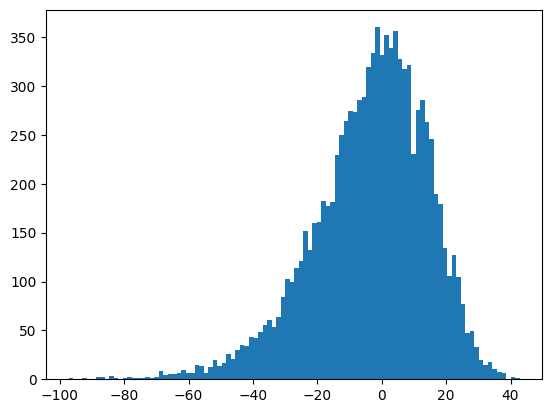

In [6]:
# Final portfolio value in all scenarios
vt = ct - pt

# Loss scenarios
vvar = v0 - vt
vvar = np.sort(vvar)

# Extracting VaR from the loss at the right confidence level
ivar = round(confidence * n)
var = vvar[ivar]

# Calculating ES
ESv = statistics.mean(vvar[range(math.floor(confidence * n), n)])

print("VaR:", var)
print("ES:", ESv)

# Plotting loss histogram
plt.hist(vvar, bins=100)
plt.show()